<h1 style="color: #fcd805">Exercise: distributions and bar charts</h1>

Back to the Kickstarter dataset.

1. Read the Kickstarter data into a `DataFrame` (reminder: it's the `kickstarter.csv.gz` in the `data` folder)

In [4]:
import pandas as pd

kickstarter = pd.read_csv("./data/kickstarter.csv.gz")
kickstarter.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0


2. Visualise the distribution of the goal amount across the entire dataset using a histogram.

What conclusions do you draw?

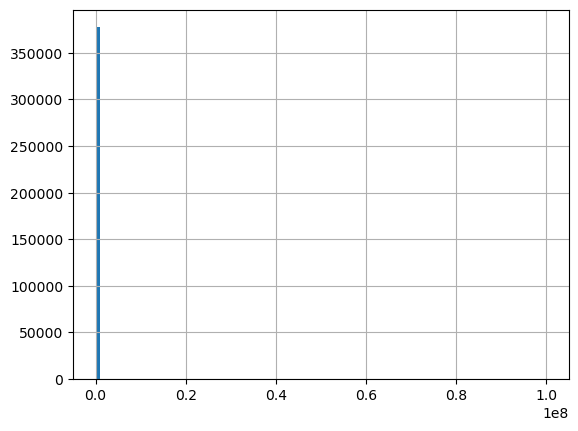

In [2]:
_ = kickstarter["goal"].hist(bins=100)

_No matter how many bins you try, the distribution looks mostly near 0. This will be because there are a handful of very large goal amounts skewing the entire distribution. We can zoom in by filtering those large amounts out:_

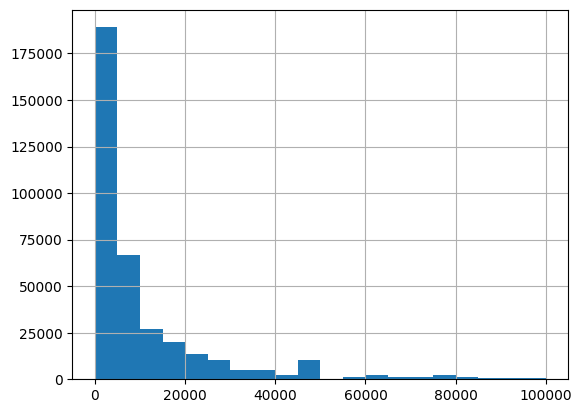

In [5]:
small_projects = kickstarter[kickstarter["goal"] < 100_000]

_ = small_projects["goal"].hist(bins=20)

_Still heavily skewed to the right, because most projects are under $20k with a few outliers_

3. Compare the distribution of the goal amount across different categories using boxplots.

What do you conclude?

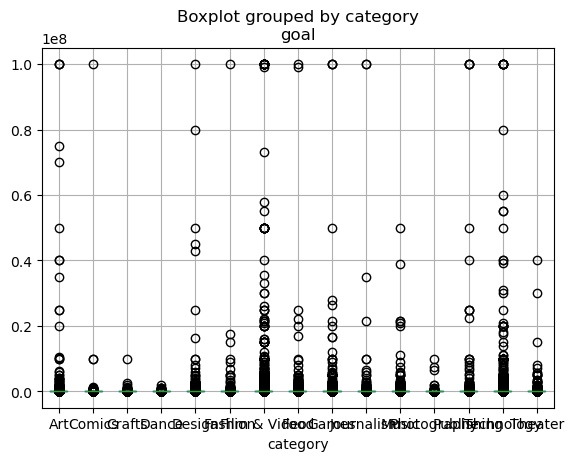

In [4]:
_ = kickstarter.boxplot(column="goal", by="category")

_Same problem, let's zoom in:_

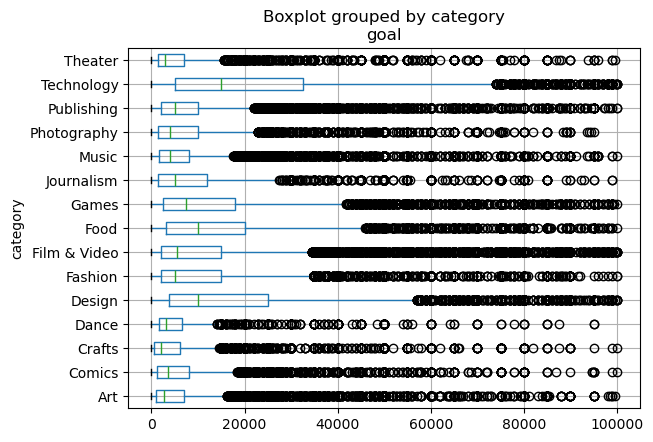

In [5]:
_ = small_projects.boxplot(column="goal", by="category", vert=False)

_Food, design and technology have higher median goal values. Categories like art and dance have smaller median goals, but every category has lots of outliers_

4. Create a column to calculate the pledged amount as a percentage of the goal amount.

In [6]:
kickstarter["pledged_pct"] = kickstarter["pledged"] / kickstarter["goal"]

5. Visualise the *average* of this percentage for each "state" of projects, as a bar chart.

Each bar will represent the average "completion rate" of a project across successful and failed projects (and any other category that appears in the `state` column).

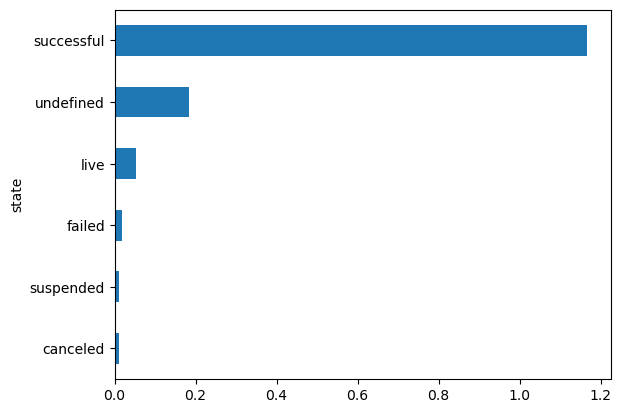

In [7]:
pct_by_state = kickstarter.groupby("state")["pledged_pct"].median()
_ = pct_by_state.sort_values().plot.barh()

_Failed projects were generally less than 10% towards their goal_

<h1 style="color: #fcd805">Exercise: scatter plots and correlation</h1>

Looking at the Kickstarter data, answer the following questions.

1. Is there a relationship between the goal amount and the amount that was pledged for a project?

Answer this question both numerically and visually.

In [8]:
kickstarter.corr(numeric_only=True)

,ID,goal,pledged,backers,usd pledged,pledged_pct
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000838
goal,0.001679,1.000000,0.007358,0.004012,0.005534,-0.000472
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.008646
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.016606
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.006484
pledged_pct,-0.000838,-0.000472,0.008646,0.016606,0.006484,1.000000


_Goal and pledged amount are surprisingly uncorrelated. Projects with higher goals don't tend to get higher amounts pledged, but this could be skewed by the >$100k projects that were never funded_

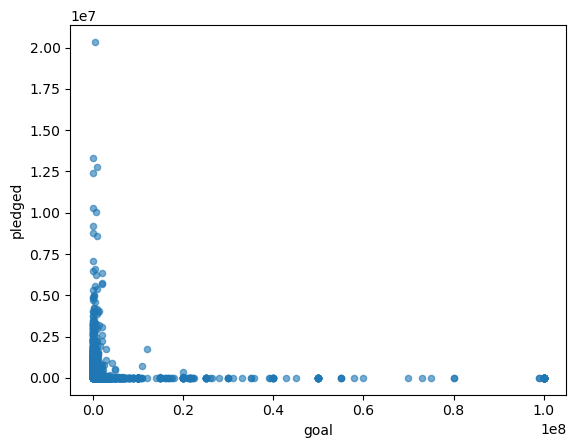

In [9]:
_ = kickstarter.plot(kind="scatter",
                     x="goal",
                     y="pledged",
                     alpha=0.6)

_The scatter plot shows this too. Above a certain goal amount the pledges are basically 0._

2. Is there a relationship between the number of backers and the *percentage* of the goal that was reached?

Answer this question both numerically and visually.

_Note: you will need your created column for this from a previous exercise!_

In [10]:
# we can treat the correlation matrix as a DataFrame
# and only select certain columns
kickstarter.corr(numeric_only=True)["backers"]

ID             0.000654
goal           0.004012
pledged        0.717079
backers        1.000000
usd pledged    0.697426
pledged_pct    0.016606
Name: backers, dtype: float64

_The number of backers is strongly correlated with the pledged amount, but not the pledged percentage. More backers doesn't necessarily mean the project is closer to completion._

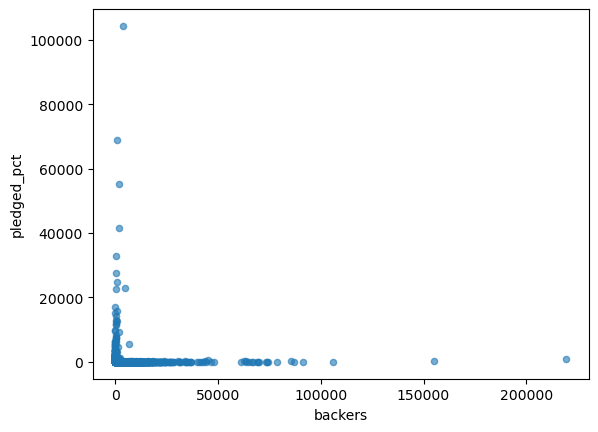

In [11]:
_ = kickstarter.plot(kind="scatter",
                     x="backers",
                     y="pledged_pct",
                     alpha=0.6)

<h1 style="color: #fcd805">Exercise: line charts</h1>

Back to our Kickstarter data.

1. Convert the `launched` column to be a date type.

In [6]:
kickstarter["launched"] = pd.to_datetime(kickstarter["launched"])

2. Calculate the *number of projects* per day using the `launched` column.

_Tip: if a datetime column has a time component, you can isolate just the date using `.dt.date`_

In [7]:
kickstarter.groupby(kickstarter["launched"].dt.date).size()

launched
1970-01-01     7
2009-04-21     1
2009-04-23     1
2009-04-24     1
2009-04-25     1
              ..
2017-12-29    58
2017-12-30    41
2017-12-31    42
2018-01-01    84
2018-01-02    40
Length: 3169, dtype: int64

_Oops, there are days with a UNIX date, let's delete those._

In [8]:
kickstarter = kickstarter[kickstarter["launched"] > "2009-01-01"]
daily_projects = kickstarter.groupby(kickstarter["launched"].dt.date).size()
daily_projects

launched
2009-04-21     1
2009-04-23     1
2009-04-24     1
2009-04-25     1
2009-04-27     1
              ..
2017-12-29    58
2017-12-30    41
2017-12-31    42
2018-01-01    84
2018-01-02    40
Length: 3168, dtype: int64

3. Visualise the number of projects per day as a line chart.

Use `matplotlib` to create a figure and axis object and try lots of options to make your chart look unique!

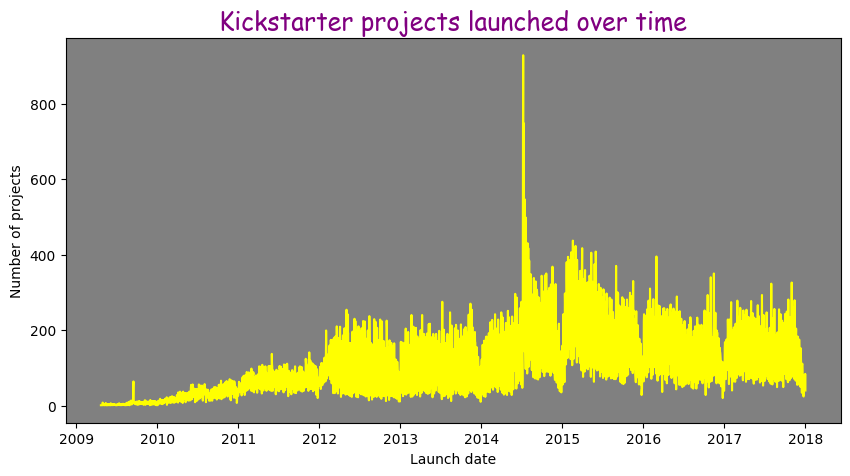

In [9]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10, 5))

daily_projects.plot(ax=axis, color="yellow")

axis.set(
    xlabel="Launch date",
    ylabel="Number of projects",
    facecolor="gray"
)

axis.set_title("Kickstarter projects launched over time",
               fontdict={
                   'fontsize': 18,
                   'fontname': "Comic Sans MS",
                   'color': "purple"
               })

plt.show()